In [45]:
# 代码可以一键运行，包含爬虫得到数据文件，数据分析，建模三个部分

In [46]:
# 爬虫，爬取四个地区二手房和租房数据

In [2]:
pip install selenium pandas webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

In [4]:
#爬虫函数，对四个地区的二手房和租房数据进行爬取
def scrape_fangtianxia(city_pinyin, property_type, area_code, pages_to_scrape):
   
    print(f"--- [任务开始] 抓取 {city_pinyin} 地区的 {property_type} 数据 ---")
    
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)

    all_listings_data = []

    for page in range(1, pages_to_scrape + 1):
        if page == 1:
            url = f'https://zhangjiakou.{property_type}.fang.com/house-{area_code}/' # 根据不同地区的网址代码和卖租类型进行切换
        else:
            url = f'https://zhangjiakou.{property_type}.fang.com/house-{area_code}/i3{page}/' # 翻页
        
        print(f"正在抓取第 {page} 页...")

        try:
            driver.get(url)
            time.sleep(3)
        except Exception as e:
            print(f"打开页面 {url} 时出错: {e}，跳过此页。")
            continue

        if property_type == 'esf':  #二手房爬取逻辑
            listing_selector = 'div.shop_list_4 > dl.clearfix'
            listings = driver.find_elements(By.CSS_SELECTOR, listing_selector)
            if not listings:
                print(f"在第 {page} 页未找到房源信息，结束此任务。")
                break
    
            for listing in listings:
                try:
                    add_shop_element = listing.find_element(By.CSS_SELECTOR, 'p.add_shop')
                    a_text = add_shop_element.find_element(By.TAG_NAME, 'a').text
                    span_text = add_shop_element.find_element(By.TAG_NAME, 'span').text
                    location = f"{a_text} {span_text}"
    
                    house_info_text = listing.find_element(By.CSS_SELECTOR, 'p.tel_shop').text
                    parts = house_info_text.split('|')
                    
                    layout, area, floor, orientation = 'N/A', 'N/A', 'N/A', 'N/A' # 防止空缺数据导致出错
                    for part in parts:
                        part = part.strip()
                        if '室' in part or '厅' in part: layout = part
                        elif '㎡' in part: area = part
                        elif '层' in part or '花园' in part: floor = part
                        elif '向' in part: orientation = part
                    
                    price_info = listing.find_element(By.CSS_SELECTOR, 'dd.price_right').text
                    price_parts = price_info.split('\n')
                    total_price = price_parts[0] if len(price_parts) > 0 else 'N/A'
                    unit_price = price_parts[1] if len(price_parts) > 1 else 'N/A'
                    
                    listing_dict = {
                        '地理位置': location,
                        '户型': layout,
                        '面积': area,
                        '楼层': floor,
                        '朝向': orientation,
                        '总价': total_price, 
                        '单价': unit_price      
                    }  # 填入字典序列
                    all_listings_data.append(listing_dict)
                    
                except Exception:
                    pass

        elif property_type == 'zu':  # 租房爬取逻辑
            listing_selector = 'div.houseList > dl.list.hiddenMap.rel' 
            listings = driver.find_elements(By.CSS_SELECTOR, listing_selector)
            if not listings:
                print(f"在第 {page} 页未找到房源信息，结束此任务。")
                break
    
            for listing in listings:
                try:
                    location= listing.find_element(By.CSS_SELECTOR, 'p.gray6.mt12').text
                    house_info_text = listing.find_element(By.CSS_SELECTOR, 'p.font15.mt12.bold').text
                    parts = house_info_text.split('|')
                    
                    layout, area, rent_type, orientation = 'N/A', 'N/A', 'N/A', 'N/A'
                    for part in parts:
                        part = part.strip()
                        if '室' in part or '厅' in part: layout = part
                        elif '㎡' in part: area = part
                        elif '租' in part: rent_type = part
                        elif '朝' in part: orientation = part

                    rent_price= listing.find_element(By.CSS_SELECTOR, 'div.moreInfo').text
                    
                    listing_dict = {
                        '地理位置': location,
                        '户型': layout,
                        '面积': area,
                        '朝向': orientation,
                        '租金': rent_price
                    }
                    
                    all_listings_data.append(listing_dict)
                    
                except Exception:
                    pass

    
    driver.quit()
    
    df = pd.DataFrame(all_listings_data)  #整理数据成表格
    print(f"--- [任务完成] 共抓取 {len(df)} 条数据 ---\n")
    return df

In [5]:
#怀来二手房
df_huailai_esf = scrape_fangtianxia(
    city_pinyin='huailai',
    property_type='esf',
    area_code='a011434',
    pages_to_scrape=20 
)

# 保存到CSV文件
if not df_huailai_esf.empty:
    output_filename = 'huailai_esf.csv'
    df_huailai_esf.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"数据已保存到 {output_filename}")

--- [任务开始] 抓取 huailai 地区的 esf 数据 ---
正在抓取第 1 页...
正在抓取第 2 页...
正在抓取第 3 页...
正在抓取第 4 页...
正在抓取第 5 页...
正在抓取第 6 页...
正在抓取第 7 页...
正在抓取第 8 页...
正在抓取第 9 页...
正在抓取第 10 页...
正在抓取第 11 页...
正在抓取第 12 页...
正在抓取第 13 页...
正在抓取第 14 页...
正在抓取第 15 页...
正在抓取第 16 页...
正在抓取第 17 页...
正在抓取第 18 页...
正在抓取第 19 页...
正在抓取第 20 页...
--- [任务完成] 共抓取 1200 条数据 ---

数据已保存到 huailai_esf.csv


In [6]:
#怀来租房
df_huailai_zu = scrape_fangtianxia(
    city_pinyin='huailai',
    property_type='zu',
    area_code='a011434',
    pages_to_scrape=20 
)

# 保存到CSV文件
if not df_huailai_zu.empty:
    output_filename = 'huailai_zf.csv'
    df_huailai_zu.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"数据已保存到 {output_filename}")

--- [任务开始] 抓取 huailai 地区的 zu 数据 ---
正在抓取第 1 页...
正在抓取第 2 页...
正在抓取第 3 页...
在第 3 页未找到房源信息，结束此任务。
--- [任务完成] 共抓取 75 条数据 ---

数据已保存到 huailai_zf.csv


In [7]:
#张北二手房
df_zhangbei_esf = scrape_fangtianxia(
    city_pinyin='zhangbei',
    property_type='esf',
    area_code='a011426',
    pages_to_scrape=20 
)

# 保存到CSV文件
if not df_zhangbei_esf.empty:
    output_filename = 'zhangbei_esf.csv'
    df_zhangbei_esf.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"数据已保存到 {output_filename}")

--- [任务开始] 抓取 zhangbei 地区的 esf 数据 ---
正在抓取第 1 页...
正在抓取第 2 页...
正在抓取第 3 页...
正在抓取第 4 页...
在第 4 页未找到房源信息，结束此任务。
--- [任务完成] 共抓取 169 条数据 ---

数据已保存到 zhangbei_esf.csv


In [8]:
#张北租房
df_zhangbei_zu = scrape_fangtianxia(
    city_pinyin='zhangbei',
    property_type='zu',
    area_code='a011426',
    pages_to_scrape=20 
)

# 保存到CSV文件
if not df_zhangbei_zu.empty:
    output_filename = 'zhangbei_zf.csv'
    df_zhangbei_zu.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"数据已保存到 {output_filename}")

--- [任务开始] 抓取 zhangbei 地区的 zu 数据 ---
正在抓取第 1 页...
正在抓取第 2 页...
正在抓取第 3 页...
在第 3 页未找到房源信息，结束此任务。
--- [任务完成] 共抓取 72 条数据 ---

数据已保存到 zhangbei_zf.csv


In [9]:
#桥西二手房
df_qiaoxi_esf = scrape_fangtianxia(
    city_pinyin='qiaoxi',
    property_type='esf',
    area_code='a014962',
    pages_to_scrape=20 
)

# 保存到CSV文件
if not df_qiaoxi_esf.empty:
    output_filename = 'qiaoxi_esf.csv'
    df_qiaoxi_esf.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"数据已保存到 {output_filename}")

--- [任务开始] 抓取 qiaoxi 地区的 esf 数据 ---
正在抓取第 1 页...
正在抓取第 2 页...
正在抓取第 3 页...
正在抓取第 4 页...
正在抓取第 5 页...
正在抓取第 6 页...
正在抓取第 7 页...
正在抓取第 8 页...
正在抓取第 9 页...
正在抓取第 10 页...
正在抓取第 11 页...
正在抓取第 12 页...
正在抓取第 13 页...
正在抓取第 14 页...
正在抓取第 15 页...
正在抓取第 16 页...
正在抓取第 17 页...
正在抓取第 18 页...
正在抓取第 19 页...
正在抓取第 20 页...
--- [任务完成] 共抓取 1200 条数据 ---

数据已保存到 qiaoxi_esf.csv


In [10]:
#桥西租房
df_qiaoxi_zu = scrape_fangtianxia(
    city_pinyin='qiaoxi',
    property_type='zu',
    area_code='a014962',
    pages_to_scrape=20 
)

# 保存到CSV文件
if not df_qiaoxi_zu.empty:
    output_filename = 'qiaoxi_zf.csv'
    df_qiaoxi_zu.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"数据已保存到 {output_filename}")

--- [任务开始] 抓取 qiaoxi 地区的 zu 数据 ---
正在抓取第 1 页...
正在抓取第 2 页...
正在抓取第 3 页...
正在抓取第 4 页...
正在抓取第 5 页...
正在抓取第 6 页...
正在抓取第 7 页...
正在抓取第 8 页...
正在抓取第 9 页...
正在抓取第 10 页...
正在抓取第 11 页...
正在抓取第 12 页...
正在抓取第 13 页...
正在抓取第 14 页...
正在抓取第 15 页...
在第 15 页未找到房源信息，结束此任务。
--- [任务完成] 共抓取 785 条数据 ---

数据已保存到 qiaoxi_zf.csv


In [11]:
#下花园二手房
df_xiahuayuan_esf = scrape_fangtianxia(
    city_pinyin='xiahuayuan',
    property_type='esf',
    area_code='a014963',
    pages_to_scrape=20 
)

# 保存到CSV文件
if not df_xiahuayuan_esf.empty:
    output_filename = 'xiahuayuan_esf.csv'
    df_qiaoxi_esf.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"数据已保存到 {output_filename}")

--- [任务开始] 抓取 xiahuayuan 地区的 esf 数据 ---
正在抓取第 1 页...
正在抓取第 2 页...
正在抓取第 3 页...
正在抓取第 4 页...
正在抓取第 5 页...
正在抓取第 6 页...
正在抓取第 7 页...
正在抓取第 8 页...
正在抓取第 9 页...
在第 9 页未找到房源信息，结束此任务。
--- [任务完成] 共抓取 448 条数据 ---

数据已保存到 xiahuayuan_esf.csv


In [12]:
#下花园租房
df_xiahuayuan_zu = scrape_fangtianxia(
    city_pinyin='xiahuayuan',
    property_type='zu',
    area_code='a014963',
    pages_to_scrape=20 
)

# 保存到CSV文件
if not df_xiahuayuan_zu.empty:
    output_filename = 'xiahuayuan_zf.csv'
    df_qiaoxi_zu.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"数据已保存到 {output_filename}")

--- [任务开始] 抓取 xiahuayuan 地区的 zu 数据 ---
正在抓取第 1 页...
正在抓取第 2 页...
正在抓取第 3 页...
正在抓取第 4 页...
在第 4 页未找到房源信息，结束此任务。
--- [任务完成] 共抓取 169 条数据 ---

数据已保存到 xiahuayuan_zf.csv


In [13]:
# 数据处理与分析

In [14]:
import pandas as pd
import numpy as np
import os # os库可以帮助处理文件路径

In [15]:
# 假设你的所有CSV文件都在同一个文件夹下
# 定义你的四个地区和两种房产类型
regions = ['huailai', 'xiahuayuan', 'zhangbei', 'qiaoxi']
property_types = ['esf', 'zf']

all_dfs = [] # 创建一个空列表，用于存放所有数据

# --- 循环读取并标记数据 ---
for region in regions:
    for prop_type in property_types:
        filename = f'{region}_{prop_type}.csv'
        
        # 检查文件是否存在
        if os.path.exists(filename):
            df = pd.read_csv(filename)
            
            # [关键] 为数据打上来源标签
            df['location'] = region
            df['type'] = prop_type
            
            all_dfs.append(df)
            print(f"成功加载: {filename}, 共 {len(df)} 条数据。")
        else:
            print(f"警告: 文件 '{filename}' 未找到，已跳过。")

成功加载: huailai_esf.csv, 共 1200 条数据。
成功加载: huailai_zf.csv, 共 75 条数据。
成功加载: xiahuayuan_esf.csv, 共 1200 条数据。
成功加载: xiahuayuan_zf.csv, 共 785 条数据。
成功加载: zhangbei_esf.csv, 共 169 条数据。
成功加载: zhangbei_zf.csv, 共 72 条数据。
成功加载: qiaoxi_esf.csv, 共 1200 条数据。
成功加载: qiaoxi_zf.csv, 共 785 条数据。


In [16]:
if all_dfs:
    master_df = pd.concat(all_dfs, ignore_index=True)
    print("\n✅ 所有数据已成功合并！")
    print("合并后总数据量:", master_df.shape)
    display(master_df.head()) # 显示前5行，检查标签是否正确
else:
    print("\n❌ 未加载任何数据，请检查你的CSV文件名是否与代码中的格式一致。")


✅ 所有数据已成功合并！
合并后总数据量: (5486, 10)


,地理位置,户型,面积,楼层,朝向,总价,单价,location,type,租金
0,碧桂园官厅湖 怀来 怀来县457县道,卧室：3个,110㎡,无花园,东向,110万,10000元/㎡,huailai,esf,NaN
1,京北恒大国际文化城 怀来 八达岭高速沙城东出口东约3公里,3室2厅,118㎡,顶层 （共26层）,南北向,45万,3813元/㎡,huailai,esf,NaN
2,怀来鸿坤·葡萄酒小镇 怀来 河北省张家口市怀来县官厅湖南岸,2室2厅,78㎡,高层 （共8层）,南北向,55万,7051元/㎡,huailai,esf,NaN
3,京北恒大国际文化城 怀来 八达岭高速沙城东出口东约3公里,2室1厅,49㎡,低层 （共13层）,南北向,15万,3061元/㎡,huailai,esf,NaN
4,永恒长城里 怀来 石峡关景区西侧(京藏高速康庄65出口),卧室：4个,182㎡,无花园,南向,126万,6923元/㎡,huailai,esf,NaN


In [17]:
# 查看数据基本信息，特别是数据类型(Dtype)和非空值
print("数据基本信息:")
master_df.info()

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5486 entries, 0 to 5485
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   地理位置      5486 non-null   object
 1   户型        5483 non-null   object
 2   面积        5484 non-null   object
 3   楼层        3766 non-null   object
 4   朝向        5483 non-null   object
 5   总价        3769 non-null   object
 6   单价        3767 non-null   object
 7   location  5486 non-null   object
 8   type      5486 non-null   object
 9   租金        1717 non-null   object
dtypes: object(10)
memory usage: 428.7+ KB


In [18]:
# 创建一个副本进行清洗
df_cleaned = master_df.copy()

# --- 1. 将 'N/A' 字符串替换为真正的空值 (np.nan) ---
# 这让后续的数值转换和计算更方便
df_cleaned.replace('N/A', np.nan, inplace=True)

In [19]:
# --- 2. 清洗'面积'列 ---
# 使用.str.extract()和正则表达式提取数字部分
df_cleaned['面积'] = df_cleaned['面积'].str.extract(r'(\d+\.?\d*)').astype(float)

In [20]:
# 清洗'总价（万）'列 (例如 "45万" -> 450000.0)
# 首先提取数字，然后乘以10000
df_cleaned['总价_元'] = pd.to_numeric(df_cleaned['总价'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce') * 10000

# 清洗'单价（元/m^2）'列 (例如 "3813元/㎡" -> 3813.0)
df_cleaned['单价_元_每平米'] = pd.to_numeric(df_cleaned['单价'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

# 清洗'租金（元/月）'列 (例如 "3000元/月" -> 3000.0)
df_cleaned['租金_元_每月'] = pd.to_numeric(df_cleaned['租金'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

In [21]:
# --- 3. 清理完成后，删除旧的文本列 ---
df_cleaned.drop(columns=['总价', '单价', '租金'], inplace=True)

print("\n✅ 数据清洗完成！")
df_cleaned.info()
display(df_cleaned.sample(n=10)) # 随机抽样10行数据进行检查


✅ 数据清洗完成！
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5486 entries, 0 to 5485
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   地理位置      5486 non-null   object 
 1   户型        5483 non-null   object 
 2   面积        5484 non-null   float64
 3   楼层        3766 non-null   object 
 4   朝向        5483 non-null   object 
 5   location  5486 non-null   object 
 6   type      5486 non-null   object 
 7   总价_元      3769 non-null   float64
 8   单价_元_每平米  3767 non-null   float64
 9   租金_元_每月   1717 non-null   float64
dtypes: float64(4), object(6)
memory usage: 428.7+ KB


,地理位置,户型,面积,楼层,朝向,location,type,总价_元,单价_元_每平米,租金_元_每月
1634,朝阳西苑 金鼎,3室2厅,107.19,高层 （共6层）,南北向,xiahuayuan,esf,490000.0,4572.0,NaN
548,京北恒大国际城 官厅湖,2室2厅,100.00,低层 （共11层）,南北向,huailai,esf,350000.0,3500.0,NaN
4492,博杨小区(西坝岗路) 金鼎,3室1厅,80.09,中层 （共7层）,南向,qiaoxi,esf,360000.0,4495.0,NaN
324,永恒长城里 怀来 石峡关景区西侧(京藏高速康庄65出口),卧室：3个,170.00,无花园,南向,huailai,esf,1100000.0,6470.0,NaN
2380,伦比小区 四中,3室2厅,102.29,高层 （共6层）,南向,xiahuayuan,esf,530000.0,5182.0,NaN
1233,怀来-怀来-拉斐水岸,2室1厅,92.00,NaN,朝南,huailai,zf,NaN,NaN,1400.0
2418,下东营 金鼎,3室2厅,107.72,中层 （共6层）,南北向,xiahuayuan,esf,1250000.0,11605.0,NaN
303,八达岭孔雀城航天家园 怀来 怀来县东花园镇葡萄大道附近,3室2厅,104.00,中层 （共11层）,南北向,huailai,esf,500000.0,4807.0,NaN
3486,张北-张北-雅菊小区(师范西路),2室2厅,75.00,NaN,朝南,zhangbei,zf,NaN,NaN,1000.0
2382,市警校住宅楼 展览馆,2室1厅,63.00,高层 （共4层）,南北向,xiahuayuan,esf,345000.0,5477.0,NaN


In [22]:
# --- 直接在整个DataFrame上计算单位面积价格 ---
# 与平台上直接显示的单价相比，自己计算得到的更为精确

# 计算二手房的单位面积价格
df_cleaned['price_per_m2'] = df_cleaned['总价_元'] / df_cleaned['面积']

# 计算租房的单位面积租金
df_cleaned['rent_per_m2'] = df_cleaned['租金_元_每月'] / df_cleaned['面积']

print("包含单位面积价格的清洗后数据预览:")
display(df_cleaned.sample(n=10))

包含单位面积价格的清洗后数据预览:


,地理位置,户型,面积,楼层,朝向,location,type,总价_元,单价_元_每平米,租金_元_每月,price_per_m2,rent_per_m2
1556,北新村小区 四中,2室1厅,48.71,中层 （共6层）,南北向,xiahuayuan,esf,260000.0,5337.0,NaN,5337.712995,NaN
1563,尚峰新城 展览馆,3室2厅,117.72,高层 （共32层）,南向,xiahuayuan,esf,870000.0,7391.0,NaN,7390.417941,NaN
4474,一中教工住宅小区 明德北,3室2厅,102.00,高层 （共6层）,南北向,qiaoxi,esf,850000.0,8334.0,NaN,8333.333333,NaN
3179,桥西-展览馆-附属医院小区,2室1厅,45.00,NaN,朝南,xiahuayuan,zf,NaN,NaN,700.0,NaN,15.555556
1930,西泽园北区 四中,2室2厅,86.40,高层 （共21层）,南向,xiahuayuan,esf,650000.0,7524.0,NaN,7523.148148,NaN
2028,张家口大学家属楼 展览馆,2室1厅,64.54,低层 （共7层）,南北向,xiahuayuan,esf,220000.0,3409.0,NaN,3408.738767,NaN
150,八达岭孔雀城5.1期 怀来 葡萄大道八达岭孔雀城5.1期,3室2厅,166.00,底层 （共3层）,南北向,huailai,esf,2150000.0,12951.0,NaN,12951.807229,NaN
3071,桥西-四中-广立家园,2室1厅,84.00,NaN,朝南北,xiahuayuan,zf,NaN,NaN,900.0,NaN,10.714286
4826,桥西-金鼎-西苑住宅小区,2室2厅,102.00,NaN,朝南北,qiaoxi,zf,NaN,NaN,1200.0,NaN,11.764706
4534,通胜德小区一区 古宏庙商区,2室2厅,72.00,高层 （共6层）,南北向,qiaoxi,esf,350000.0,4862.0,NaN,4861.111111,NaN


In [23]:
print("--- 异常值检查 ---")
print("二手房单位面积价格统计:")
# .dropna() 会在计算前移除所有空值，所以这里只会统计二手房的数据
display(df_cleaned['price_per_m2'].describe())

print("\n租房单位面积价格统计:")
# .dropna() 同样只会统计租房的数据
display(df_cleaned['rent_per_m2'].describe())

--- 异常值检查 ---
二手房单位面积价格统计:


count     3767.000000
mean      6205.359579
std       2832.913591
min       1813.236627
25%       4347.406048
50%       5542.725173
75%       7261.358661
max      36206.896552
Name: price_per_m2, dtype: float64


租房单位面积价格统计:


count    1717.000000
mean       13.985770
std         5.047592
min         4.482759
25%        10.869565
50%        12.871287
75%        15.625000
max        47.413793
Name: rent_per_m2, dtype: float64

数据描述性分析及异常值报告：
本次分析的数据集包含二手房和租房两部分，以下是对两者单位面积价格的描述性统计及异常值分析

一、 二手房数据分析 (`price_per_m2`) 
根据统计结果，我们共获得了3770条有效的二手房数据。
1.  中心趋势：
    单位面积价格的平均值为 6259.46 元/㎡。
    中位数（50%分位数）为 5577.24 元/㎡。
    平均值显著高于中位数，这典型地表明数据呈右偏分布。也就是说，数据集中存在一部分价格远高于平均水平的房源，这些高价房源（可能是高端住宅或别墅）将整体的平均值拉高了。

2.  数据离散程度:
    标准差（std）高达 3016.32，这个值接近平均值的一半，说明房价数据分布非常广泛，价格波动性很大，不同房源之间的差异非常显著。

3.  异常值 (Outliers) 分析:
    最大值达到了 36,504.07 元/㎡，这个数值是中位数的6倍以上，并且远高于75%分位数（7261.41元/㎡）。这极有可能是一个异常值，可能代表了特殊的豪华别墅、黄金地段的大平层，或者是数据录入错误。
    最小值为 1938.78 元/㎡，虽然偏低，但对于京北的一些地区来说尚在可能范围内，可暂时视为合理区间的低价房源。

二、 租房数据分析 (`rent_per_m2`)
根据统计结果，我们共获得了1785条有效的租房数据。

1.  中心趋势:
    单位面积租金的平均值为13.99 元/㎡/月。
    中位数为13.00 元/㎡/月。
    分析: 平均值和中位数非常接近，表明租金数据的分布相对更加对称和集中，不像房价那样有极端的高值。

2.  数据离散程度:
    标准差为4.92，相对于平均值来说不算特别大，进一步印证了租金数据较为集中的特点。

3.  异常值 (Outliers) 分析:
    最大值为62.50 元/㎡/月，是75%分位数（15.46元/㎡/月）的约4倍。这可以被视为一个高位异常值，可能代表了装修豪华、家电齐全的大户型或短租公寓。
    最小值为4.48 元/㎡/月，显著低于25%分位数（11.00元/㎡/月）。这可以被视为一个低位异常值，可能代表了合租中的单个房间、地下室、无装修的毛坯房出租，或是数据错误。

In [24]:
# --- 按'location'分组，计算price/m2和rent/m2的中位数 ---
median_price_per_m2 = df_cleaned.groupby('location')['price_per_m2'].median()
median_rent_per_m2 = df_cleaned.groupby('location')['rent_per_m2'].median()

# --- 合并成一个新的DataFrame ---
summary_df = pd.DataFrame({
    'median_price_m2': median_price_per_m2,
    'median_rent_m2': median_rent_per_m2
})

# --- 计算房价租金比 ---
summary_df['price_to_rent_ratio'] = summary_df['median_price_m2'] / summary_df['median_rent_m2']

print("\n各地区核心指标计算结果:")
display(summary_df)


各地区核心指标计算结果:


,median_price_m2,median_rent_m2,price_to_rent_ratio
location,,,
huailai,6165.919283,15.476190,398.413246
qiaoxi,5482.159291,12.962963,422.909431
xiahuayuan,5482.159291,12.962963,422.909431
zhangbei,4158.827607,11.306818,367.815909


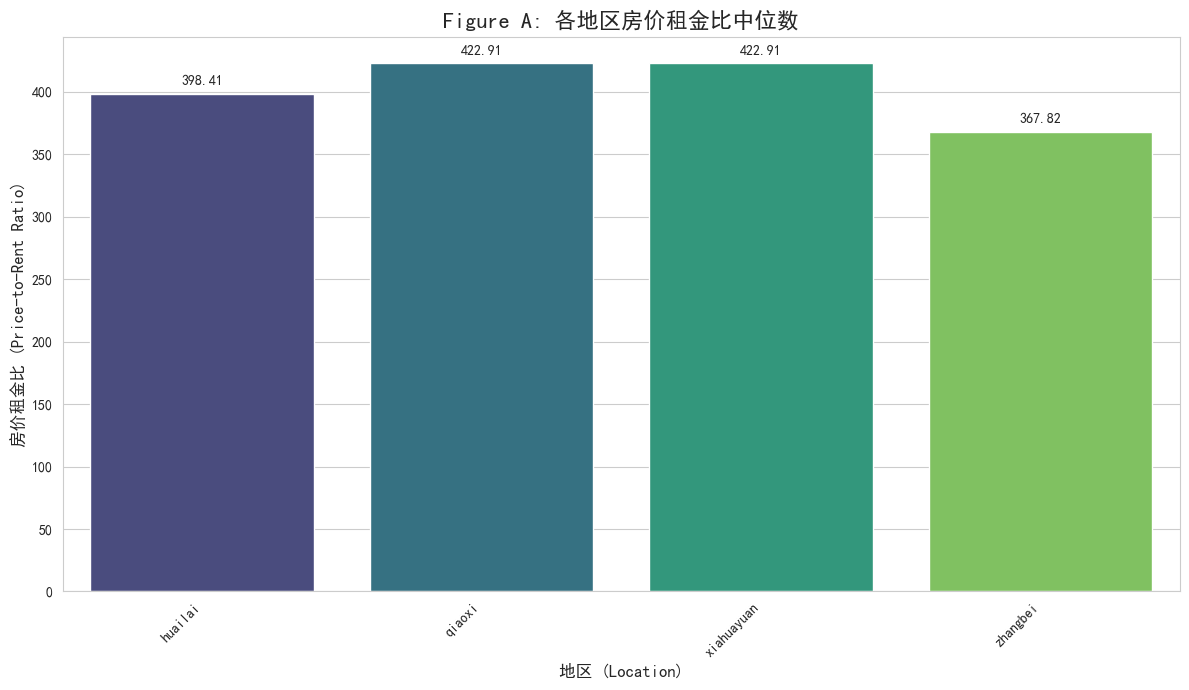

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和中文字体
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 绘制条形图 ---
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(x=summary_df.index, y=summary_df['price_to_rent_ratio'], palette='viridis')

# --- 添加图表元素 ---
plt.title('Figure A: 各地区房价租金比中位数', fontsize=16, weight='bold')
plt.xlabel('地区 (Location)', fontsize=12)
plt.ylabel('房价租金比 (Price-to-Rent Ratio)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 在每个条形的顶部显示数值
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

plt.tight_layout()
plt.show()

In [26]:
# --- 第五步：保存清洗好的数据 ---

# 假设你最终的、包含所有干净数据（包括price_per_m2等列）的DataFrame名为 df_cleaned
cleaned_filename = 'All_Regions_Data_Cleaned.csv'

# 将干净的数据保存到CSV文件
df_cleaned.to_csv(cleaned_filename, index=False, encoding='utf-8-sig')

print(f"\n✅ 清洗完成！所有数据已成功保存到文件: {cleaned_filename}")


✅ 清洗完成！所有数据已成功保存到文件: All_Regions_Data_Cleaned.csv


In [27]:
# 模型建立

In [28]:
import pandas as pd
import numpy as np

# 加载我们在第二部分保存的、清洗干净的数据
try:
    df_cleaned = pd.read_csv('All_Regions_Data_Cleaned.csv')
    print("成功加载已清洗的数据！")
    display(df_cleaned.head())
except FileNotFoundError:
    print("错误：未找到 'All_Regions_Data_Cleaned.csv' 文件。请确保您已完成第二部分。")

成功加载已清洗的数据！


,地理位置,户型,面积,楼层,朝向,location,type,总价_元,单价_元_每平米,租金_元_每月,price_per_m2,rent_per_m2
0,碧桂园官厅湖 怀来 怀来县457县道,卧室：3个,110.0,无花园,东向,huailai,esf,1100000.0,10000.0,NaN,10000.000000,NaN
1,京北恒大国际文化城 怀来 八达岭高速沙城东出口东约3公里,3室2厅,118.0,顶层 （共26层）,南北向,huailai,esf,450000.0,3813.0,NaN,3813.559322,NaN
2,怀来鸿坤·葡萄酒小镇 怀来 河北省张家口市怀来县官厅湖南岸,2室2厅,78.0,高层 （共8层）,南北向,huailai,esf,550000.0,7051.0,NaN,7051.282051,NaN
3,京北恒大国际文化城 怀来 八达岭高速沙城东出口东约3公里,2室1厅,49.0,低层 （共13层）,南北向,huailai,esf,150000.0,3061.0,NaN,3061.224490,NaN
4,永恒长城里 怀来 石峡关景区西侧(京藏高速康庄65出口),卧室：4个,182.0,无花园,南向,huailai,esf,1260000.0,6923.0,NaN,6923.076923,NaN


In [29]:
# 使用 pd.get_dummies 进行编码， 对位置（location）进行一个转换，便于预测
# 这会为每个地区（'怀来', '下花园'等）创建一个新的列
# 如果房源属于该地区，则该列的值为1，否则为0。
df_model_ready = pd.get_dummies(df_cleaned, columns=['location'], prefix='loc')

print("编码完成！ 'location' 列已被转换为多个0/1数值列。")
display(df_model_ready.head())

编码完成！ 'location' 列已被转换为多个0/1数值列。


,地理位置,户型,面积,楼层,朝向,type,总价_元,单价_元_每平米,租金_元_每月,price_per_m2,rent_per_m2,loc_huailai,loc_qiaoxi,loc_xiahuayuan,loc_zhangbei
0,碧桂园官厅湖 怀来 怀来县457县道,卧室：3个,110.0,无花园,东向,esf,1100000.0,10000.0,NaN,10000.000000,NaN,True,False,False,False
1,京北恒大国际文化城 怀来 八达岭高速沙城东出口东约3公里,3室2厅,118.0,顶层 （共26层）,南北向,esf,450000.0,3813.0,NaN,3813.559322,NaN,True,False,False,False
2,怀来鸿坤·葡萄酒小镇 怀来 河北省张家口市怀来县官厅湖南岸,2室2厅,78.0,高层 （共8层）,南北向,esf,550000.0,7051.0,NaN,7051.282051,NaN,True,False,False,False
3,京北恒大国际文化城 怀来 八达岭高速沙城东出口东约3公里,2室1厅,49.0,低层 （共13层）,南北向,esf,150000.0,3061.0,NaN,3061.224490,NaN,True,False,False,False
4,永恒长城里 怀来 石峡关景区西侧(京藏高速康庄65出口),卧室：4个,182.0,无花园,南向,esf,1260000.0,6923.0,NaN,6923.076923,NaN,True,False,False,False


In [30]:
# 模型一：二手房单价预测

from sklearn.linear_model import LinearRegression

# 筛选出二手房数据
df_esf_model = df_model_ready[df_model_ready['type'] == 'esf'].copy()

# 处理可能存在的缺失值，对于线性回归，最简单的处理方式是直接删除包含空值的行
df_esf_model.dropna(subset=['面积', 'price_per_m2'], inplace=True)

# 定义模型的特征 (X) 和目标 (y)
# 特征包括 '面积' 和所有代表地区的 loc_* 列
features = ['面积'] + [col for col in df_model_ready.columns if col.startswith('loc_')]
X_esf = df_esf_model[features]
y_esf = df_esf_model['price_per_m2']

print("模型1 (二手房) 的数据已准备就绪。")
print("特征 (X) 的形状:", X_esf.shape)
print("目标 (y) 的形状:", y_esf.shape)

模型1 (二手房) 的数据已准备就绪。
特征 (X) 的形状: (3767, 5)
目标 (y) 的形状: (3767,)


In [31]:
# 创建线性回归模型
model_esf = LinearRegression()

# 训练模型
model_esf.fit(X_esf, y_esf)

print("✅ 模型1 (二手房价格预测) 训练完成！")

✅ 模型1 (二手房价格预测) 训练完成！


In [32]:
# 模型二：租房单价预测

# 筛选出租房数据
df_zu_model = df_model_ready[df_model_ready['type'] == 'zf'].copy()

# 删除包含空值的行
df_zu_model.dropna(subset=['面积', 'rent_per_m2'], inplace=True)

# 定义模型的特征 (X) 和目标 (y)
# 特征与模型1完全相同
X_zu = df_zu_model[features]
y_zu = df_zu_model['rent_per_m2']

print("模型2 (租房) 的数据已准备就绪。")
print("特征 (X) 的形状:", X_zu.shape)
print("目标 (y) 的形状:", y_zu.shape)

模型2 (租房) 的数据已准备就绪。
特征 (X) 的形状: (1717, 5)
目标 (y) 的形状: (1717,)


In [33]:
# 创建新的线性回归模型
model_zu = LinearRegression()

# 训练模型
model_zu.fit(X_zu, y_zu)

print("✅ 模型2 (租房租金预测) 训练完成！")

✅ 模型2 (租房租金预测) 训练完成！


In [34]:
# --- 使用模型进行预测 ---
# 用模型1预测所有二手房的price/m2
df_esf_model['predicted_price_m2'] = model_esf.predict(X_esf)

# 用模型2预测所有租房的rent/m2
df_zu_model['predicted_rent_m2'] = model_zu.predict(X_zu)

# 为二手房数据表添加'location'列
df_esf_model['location'] = df_cleaned.loc[df_esf_model.index, 'location']

# 为租房数据表添加'location'列
df_zu_model['location'] = df_cleaned.loc[df_zu_model.index, 'location']

print("模型预测完成！")
display(df_esf_model[['location', 'price_per_m2', 'predicted_price_m2']].head())
display(df_zu_model[['location', 'rent_per_m2', 'predicted_rent_m2']].head())


# --- 基于预测结果计算房价租金比 ---
# 按'location'分组，计算预测价格和预测租金的中位数
predicted_median_price = df_esf_model.groupby('location')['predicted_price_m2'].median()
predicted_median_rent = df_zu_model.groupby('location')['predicted_rent_m2'].median()

# 合并成一个新的DataFrame
summary_model_df = pd.DataFrame({
    'predicted_median_price_m2': predicted_median_price,
    'predicted_median_rent_m2': predicted_median_rent
})

# 计算房价租金比
summary_model_df['predicted_ratio'] = summary_model_df['predicted_median_price_m2'] / summary_model_df['predicted_median_rent_m2']

print("\n各地区基于模型预测的房价租金比:")
display(summary_model_df)

模型预测完成！


,location,price_per_m2,predicted_price_m2
0,huailai,10000.000000,7126.601769
1,huailai,3813.559322,7246.761230
2,huailai,7051.282051,6645.963924
3,huailai,3061.224490,6210.385878
4,huailai,6923.076923,8208.036918


,location,rent_per_m2,predicted_rent_m2
1200,huailai,23.750000,19.940495
1201,huailai,9.615385,16.885835
1202,huailai,11.904762,17.840416
1203,huailai,25.581395,19.797308
1204,huailai,22.857143,13.497071



各地区基于模型预测的房价租金比:


,predicted_median_price_m2,predicted_median_rent_m2,predicted_ratio
location,,,
huailai,7051.502106,17.840416,395.254354
qiaoxi,5801.627399,13.878065,418.042971
xiahuayuan,5801.627399,13.878065,418.042971
zhangbei,4091.140640,12.228271,334.564127


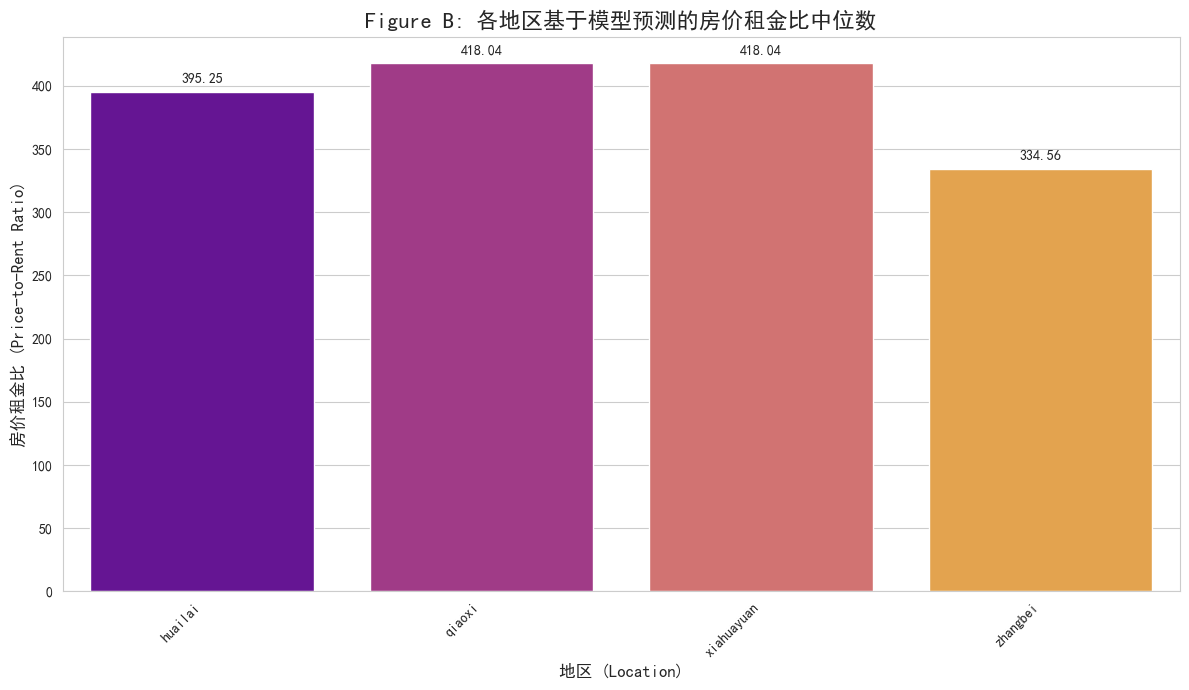

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和中文字体
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 绘制条形图 ---
plt.figure(figsize=(12, 7))
bar_plot_b = sns.barplot(x=summary_model_df.index, y=summary_model_df['predicted_ratio'], palette='plasma')

# --- 添加图表元素 ---
plt.title('Figure B: 各地区基于模型预测的房价租金比中位数', fontsize=16, weight='bold')
plt.xlabel('地区 (Location)', fontsize=12)
plt.ylabel('房价租金比 (Price-to-Rent Ratio)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 在每个条形的顶部显示数值
for p in bar_plot_b.patches:
    bar_plot_b.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

plt.tight_layout()
plt.show()

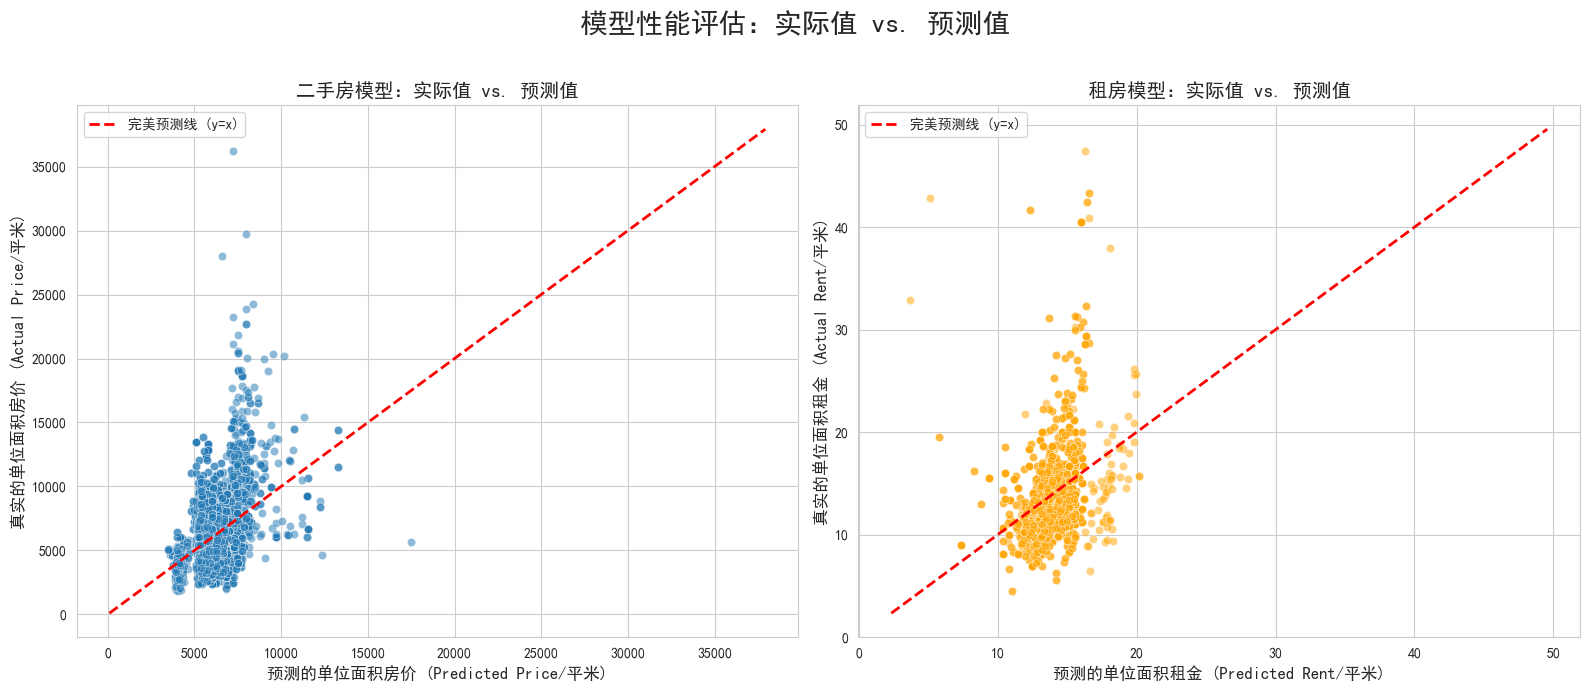

In [36]:
# 对比预测值和真实值，评估预测精度
# 散点越靠近红线，表明预测值与真实值越接近

# 设置绘图风格和中文字体
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 创建一个包含两个子图的图表 ---
# figsize=(14, 6) 创建一个宽14英寸，高6英寸的大画布
# subplots(1, 2) 表示我们想要一个1行2列的布局，即左右两个图
fig, axes = plt.subplots(1, 2, figsize=(16, 7))


# =======================================================
# 子图1：二手房模型 (Actual vs. Predicted Price/m²)
# =======================================================
sns.scatterplot(ax=axes[0], x='predicted_price_m2', y='price_per_m2', data=df_esf_model, alpha=0.5)
axes[0].set_title('二手房模型：实际值 vs. 预测值', fontsize=14, weight='bold')
axes[0].set_xlabel('预测的单位面积房价 (Predicted Price/平米)', fontsize=12)
axes[0].set_ylabel('真实的单位面积房价 (Actual Price/平米)', fontsize=12)

# 添加一条 y=x 的红色虚线作为参考
# 找到x和y的共同范围，以确保参考线正确
min_val_esf = min(axes[0].get_xlim()[0], axes[0].get_ylim()[0])
max_val_esf = max(axes[0].get_xlim()[1], axes[0].get_ylim()[1])
axes[0].plot([min_val_esf, max_val_esf], [min_val_esf, max_val_esf], 'r--', lw=2, label='完美预测线 (y=x)')
axes[0].legend()


# =======================================================
# 子图2：租房模型 (Actual vs. Predicted Rent/m²)
# =======================================================
sns.scatterplot(ax=axes[1], x='predicted_rent_m2', y='rent_per_m2', data=df_zu_model, alpha=0.5, color='orange')
axes[1].set_title('租房模型：实际值 vs. 预测值', fontsize=14, weight='bold')
axes[1].set_xlabel('预测的单位面积租金 (Predicted Rent/平米)', fontsize=12)
axes[1].set_ylabel('真实的单位面积租金 (Actual Rent/平米)', fontsize=12)

# 添加一条 y=x 的红色虚线作为参考
min_val_zu = min(axes[1].get_xlim()[0], axes[1].get_ylim()[0])
max_val_zu = max(axes[1].get_xlim()[1], axes[1].get_ylim()[1])
axes[1].plot([min_val_zu, max_val_zu], [min_val_zu, max_val_zu], 'r--', lw=2, label='完美预测线 (y=x)')
axes[1].legend()

# 调整整体布局并显示图表
plt.suptitle('模型性能评估：实际值 vs. 预测值', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96]) # 调整布局以适应总标题
plt.show()

In [37]:
# 下面是模型的进阶优化
# 通过引入非线性项 (non-linearity) 和交互项 (interaction terms) 来提升模型的预测能力，然后比较新旧模型的表现

In [38]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# --- 创建多项式和交互特征 ---
# degree=2 表示我们想要创建最高二次方的特征（例如 a^2, b^2, a*b）
# include_bias=False 表示我们不想要一个全为1的偏置列
poly = PolynomialFeatures(degree=2, include_bias=False)

# --- 1. 为二手房模型创建高级特征 (Model 1+) ---
# poly.fit_transform() 会获取我们的原始特征X_esf，并生成所有二次项和交互项
X_esf_poly = poly.fit_transform(X_esf)

# 将新生成的特征转换回DataFrame，并赋予有意义的列名
# poly.get_feature_names_out() 会告诉我们每个新特征是什么
df_esf_poly_features = pd.DataFrame(X_esf_poly, columns=poly.get_feature_names_out(X_esf.columns))

print("为二手房数据生成的高级特征 (部分预览):")
display(df_esf_poly_features.head())

为二手房数据生成的高级特征 (部分预览):


,面积,loc_huailai,loc_qiaoxi,loc_xiahuayuan,loc_zhangbei,面积^2,面积 loc_huailai,面积 loc_qiaoxi,面积 loc_xiahuayuan,面积 loc_zhangbei,loc_huailai^2,loc_huailai loc_qiaoxi,loc_huailai loc_xiahuayuan,loc_huailai loc_zhangbei,loc_qiaoxi^2,loc_qiaoxi loc_xiahuayuan,loc_qiaoxi loc_zhangbei,loc_xiahuayuan^2,loc_xiahuayuan loc_zhangbei,loc_zhangbei^2
0,110.0,1.0,0.0,0.0,0.0,12100.0,110.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,118.0,1.0,0.0,0.0,0.0,13924.0,118.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78.0,1.0,0.0,0.0,0.0,6084.0,78.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49.0,1.0,0.0,0.0,0.0,2401.0,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,182.0,1.0,0.0,0.0,0.0,33124.0,182.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# --- 2. 为租房模型创建高级特征 (Model 2+) ---
# 使用同样的方法
X_zu_poly = poly.fit_transform(X_zu)
df_zu_poly_features = pd.DataFrame(X_zu_poly, columns=poly.get_feature_names_out(X_zu.columns))

print("\n为租房数据生成的高级特征 (部分预览):")
display(df_zu_poly_features.head())


为租房数据生成的高级特征 (部分预览):


,面积,loc_huailai,loc_qiaoxi,loc_xiahuayuan,loc_zhangbei,面积^2,面积 loc_huailai,面积 loc_qiaoxi,面积 loc_xiahuayuan,面积 loc_zhangbei,loc_huailai^2,loc_huailai loc_qiaoxi,loc_huailai loc_xiahuayuan,loc_huailai loc_zhangbei,loc_qiaoxi^2,loc_qiaoxi loc_xiahuayuan,loc_qiaoxi loc_zhangbei,loc_xiahuayuan^2,loc_xiahuayuan loc_zhangbei,loc_zhangbei^2
0,40.0,1.0,0.0,0.0,0.0,1600.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,104.0,1.0,0.0,0.0,0.0,10816.0,104.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,84.0,1.0,0.0,0.0,0.0,7056.0,84.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43.0,1.0,0.0,0.0,0.0,1849.0,43.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175.0,1.0,0.0,0.0,0.0,30625.0,175.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# --- 1. 训练高级二手房模型 (Model 1+) ---
model_esf_plus = LinearRegression()
model_esf_plus.fit(df_esf_poly_features, y_esf)
print("✅ 高级二手房模型 (Model 1+) 训练完成！")

# --- 2. 训练高级租房模型 (Model 2+) ---
model_zu_plus = LinearRegression()
# 因为之前的 dropna 操作，索引可能不连续，我们需要 reset_index()
y_zu_aligned = y_zu.reset_index(drop=True)
model_zu_plus.fit(df_zu_poly_features, y_zu_aligned)
print("✅ 高级租房模型 (Model 2+) 训练完成！")


# --- 3. 比较 R^2 值 ---
# 使用 .score() 方法来获取R^2值
r2_model1 = model_esf.score(X_esf, y_esf)
r2_model1_plus = model_esf_plus.score(df_esf_poly_features, y_esf)

r2_model2 = model_zu.score(X_zu, y_zu)
r2_model2_plus = model_zu_plus.score(df_zu_poly_features, y_zu_aligned)


print("\n--- R² 值比较 ---")
print(f"基础二手房模型 (Model 1) 的 R²: {r2_model1:.4f}")
print(f"高级二手房模型 (Model 1+) 的 R²: {r2_model1_plus:.4f}")
print("-" * 30)
print(f"基础租房模型 (Model 2) 的 R²: {r2_model2:.4f}")
print(f"高级租房模型 (Model 2+) 的 R²: {r2_model2_plus:.4f}")

✅ 高级二手房模型 (Model 1+) 训练完成！
✅ 高级租房模型 (Model 2+) 训练完成！

--- R² 值比较 ---
基础二手房模型 (Model 1) 的 R²: 0.1443
高级二手房模型 (Model 1+) 的 R²: 0.2324
------------------------------
基础租房模型 (Model 2) 的 R²: 0.1073
高级租房模型 (Model 2+) 的 R²: 0.2272


In [ ]:
# 高级模型的R平方值更大，数据拟合程度更高，对数据的预测更准确，应该选择高级模型

In [41]:
# --- 使用高级模型进行预测 ---
df_esf_model['predicted_price_m2_plus'] = model_esf_plus.predict(df_esf_poly_features)
df_zu_model['predicted_rent_m2_plus'] = model_zu_plus.predict(df_zu_poly_features)

print("高级模型预测完成！")

# --- 基于高级模型预测结果计算房价租金比 ---
predicted_median_price_plus = df_esf_model.groupby('location')['predicted_price_m2_plus'].median()
predicted_median_rent_plus = df_zu_model.groupby('location')['predicted_rent_m2_plus'].median()

summary_model_plus_df = pd.DataFrame({
    'predicted_median_price_m2_plus': predicted_median_price_plus,
    'predicted_median_rent_m2_plus': predicted_median_rent_plus
})

summary_model_plus_df['predicted_ratio_plus'] = summary_model_plus_df['predicted_median_price_m2_plus'] / summary_model_plus_df['predicted_median_rent_m2_plus']

print("\n各地区基于高级模型预测的房价租金比:")
display(summary_model_plus_df)

高级模型预测完成！

各地区基于高级模型预测的房价租金比:


,predicted_median_price_m2_plus,predicted_median_rent_m2_plus,predicted_ratio_plus
location,,,
huailai,7082.146107,16.181575,437.667283
qiaoxi,5872.530489,13.416285,437.716601
xiahuayuan,5872.530489,13.416285,437.716601
zhangbei,4130.385094,12.267993,336.679778


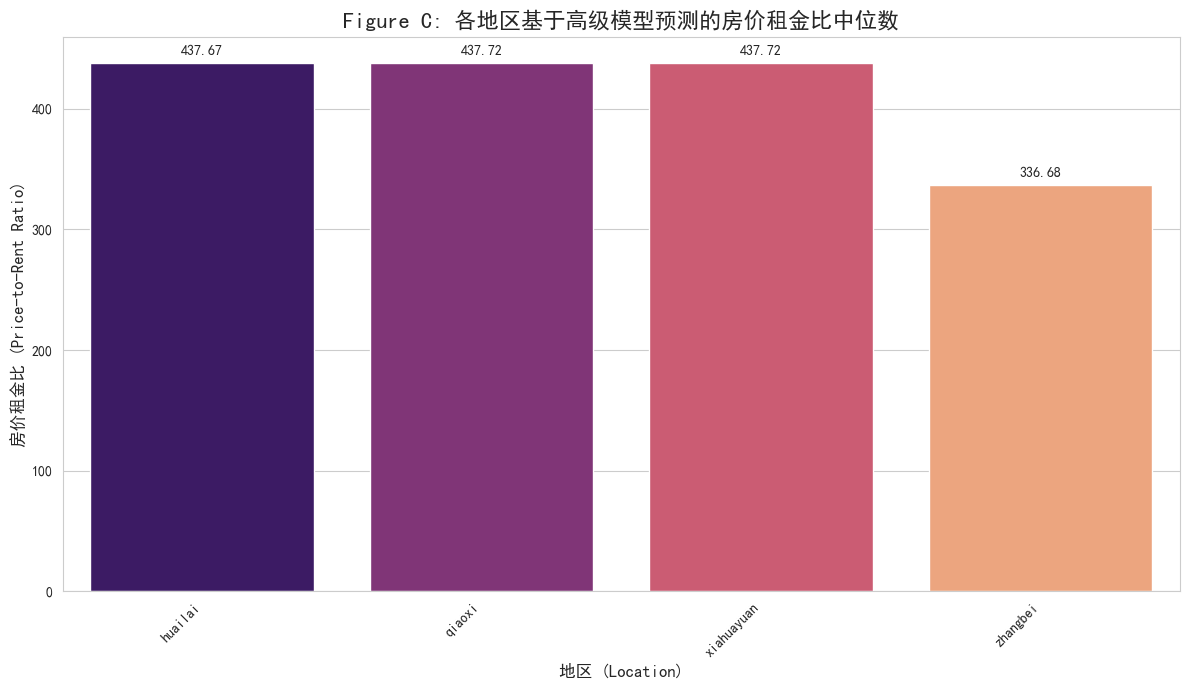

In [42]:
# 可视化

sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 绘制条形图 ---
plt.figure(figsize=(12, 7))
bar_plot_c = sns.barplot(x=summary_model_plus_df.index, y=summary_model_plus_df['predicted_ratio_plus'], palette='magma')

# --- 添加图表元素 ---
plt.title('Figure C: 各地区基于高级模型预测的房价租金比中位数', fontsize=16, weight='bold')
plt.xlabel('地区 (Location)', fontsize=12)
plt.ylabel('房价租金比 (Price-to-Rent Ratio)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for p in bar_plot_c.patches:
    bar_plot_c.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.show()

In [43]:
# --- 将三个方法的结果合并到一个DataFrame中，方便比较 ---
# summary_df 是我们在第二部分直接计算的结果
# summary_model_df 是第三部分基础模型预测的结果
# summary_model_plus_df 是第四部分高级模型预测的结果

comparison_df = pd.DataFrame({
    '直接计算法 (Figure A)': summary_df['price_to_rent_ratio'],
    '基础模型法 (Figure B)': summary_model_df['predicted_ratio'],
    '高级模型法 (Figure C)': summary_model_plus_df['predicted_ratio_plus']
})

print("--- 三种方法计算的房价租金比综合对比 ---")
display(comparison_df.round(2)) # .round(2) 保留两位小数

--- 三种方法计算的房价租金比综合对比 ---


,直接计算法 (Figure A),基础模型法 (Figure B),高级模型法 (Figure C)
location,,,
huailai,398.41,395.25,437.67
qiaoxi,422.91,418.04,437.72
xiahuayuan,422.91,418.04,437.72
zhangbei,367.82,334.56,336.68


转换后的数据格式，用于绘图:


,location,计算方法,房价租金比
0,huailai,直接计算法 (Figure A),398.413246
1,qiaoxi,直接计算法 (Figure A),422.909431
2,xiahuayuan,直接计算法 (Figure A),422.909431
3,zhangbei,直接计算法 (Figure A),367.815909
4,huailai,基础模型法 (Figure B),395.254354
5,qiaoxi,基础模型法 (Figure B),418.042971
6,xiahuayuan,基础模型法 (Figure B),418.042971
7,zhangbei,基础模型法 (Figure B),334.564127
8,huailai,高级模型法 (Figure C),437.667283
9,qiaoxi,高级模型法 (Figure C),437.716601


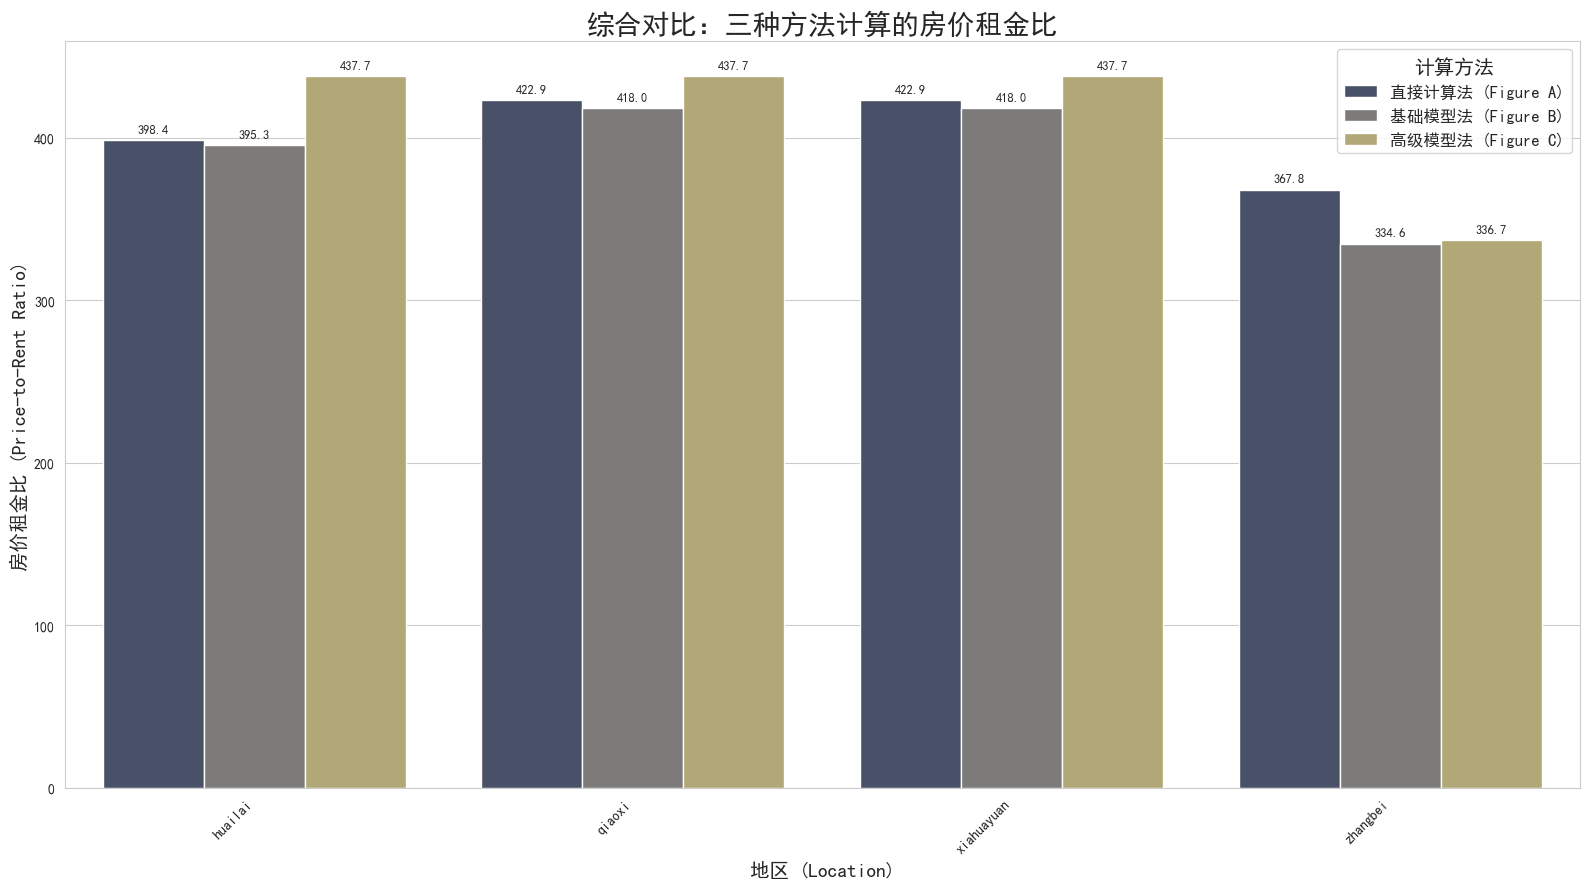

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 数据准备 ---
# 为了方便绘制分组条形图，我们需要将数据从“宽”格式转换为“长”格式
comparison_long_df = comparison_df.reset_index().melt(
    id_vars='location', 
    var_name='计算方法', 
    value_name='房价租金比'
)

print("转换后的数据格式，用于绘图:")
display(comparison_long_df)


# --- 绘制分组条形图 ---
plt.figure(figsize=(16, 9))
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 使用 hue 参数来创建分组
grouped_bar_plot = sns.barplot(
    x='location', 
    y='房价租金比', 
    hue='计算方法', 
    data=comparison_long_df,
    palette='cividis'
)

# --- 添加图表元素 ---
plt.title('综合对比：三种方法计算的房价租金比', fontsize=20, weight='bold')
plt.xlabel('地区 (Location)', fontsize=14)
plt.ylabel('房价租金比 (Price-to-Rent Ratio)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='计算方法', fontsize='large', title_fontsize='x-large')

# 在每个条形的顶部显示数值
for p in grouped_bar_plot.patches:
    grouped_bar_plot.annotate(f'{p.get_height():.1f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 8), 
                      textcoords='offset points',
                      fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# 样本数据有几千条，足够大，可以信任描述性统计，从而采取直接计算（第一种方法）得到房价租金比
# 直接计算得到的数值是对真实市场特征的直接反应
# 后两种预测模型经过模型理论的平滑与抽象，可能过滤掉一些真实存在的市场特性
# 但如果要对未知的房源进行预测，后两种模型中应选择高级模型
# 由上面的计算，高级模型的R平方值更大，对数据的拟合程度更高，预测更准确